In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv('./medical_examination.csv')

In [4]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
# Add 'overweight' column
# calculate their BMI by dividing their weight in kilograms by the square of their height in meters. 
# If that value is > 25 then the person is overweight.  # Use the value 0 for NOT overweight and the value 1 for overweight.
bmi_series = df['weight'] / (df['height']/100)**2
df['overweight'] = [1 if b>25 else 0 for b in bmi_series]
# x = [(1,0)[b>25] for b in bmi_series]
df.head(7)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,1
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,1


In [9]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)
df.head(7)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
5,8,21914,1,151,67.0,120,80,1,1,0,0,0,0,1
6,9,22113,1,157,93.0,130,80,1,0,0,0,1,0,1


In [36]:
df_cat = df.melt(id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat = df_cat.groupby(['cardio','variable', 'value']).size().reset_index(name='total')
df_cat

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


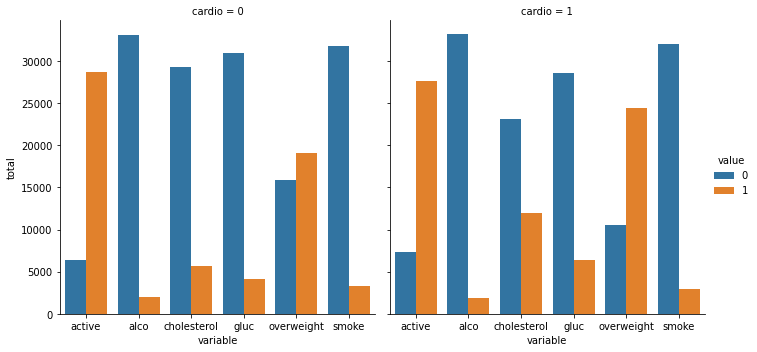

In [39]:
g = sns.catplot(x='variable',y="total", col="cardio", data=df_cat, kind="bar",hue='value')

In [40]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [65]:
# Clean the data. Filter out the following patient segments that represent incorrect data
# clean_df = df[df['ap_lo'] <= df['ap_hi']]
# print(len(clean_df))
# clean_df = clean_df[(df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975))]
# print(len(clean_df))
# clean_df = clean_df[(df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]
# print(len(clean_df))

df_clean = df[(df['ap_lo'] <= df['ap_hi']) 
    & (df['height'] >= df['height'].quantile(0.025)) 
    & (df['height'] <= df['height'].quantile(0.975)) 
    & (df['weight'] >= df['weight'].quantile(0.025)) 
    & (df['weight'] <= df['weight'].quantile(0.975)) 
    ]
print(len(clean_df))

63259


<AxesSubplot:>

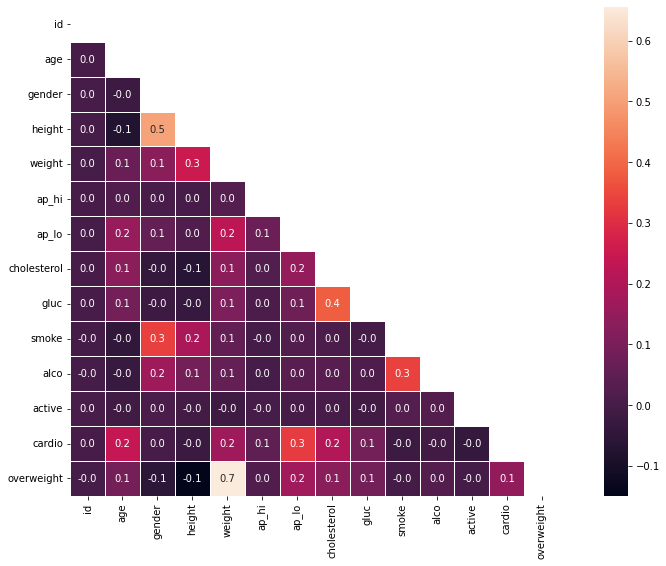

In [70]:
corr = df_clean.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16, 9))

# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr, mask=mask, square=True, linewidths=0.5, annot=True, fmt="0.1f")